In this project, we are training the model with [trainable = True] for 0-9.
We then turn off the training except for the final dense layer as we train
for A-Z (10-35). We then test the test_dataset by combining 0-9 and A-Z.

In [240]:
#defining imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets
from keras.layers import Dense
import pandas as pd



Defining a function to plot the datasets

In [241]:
def plot_sample(x, y, index):
    plt.figure(figsize = (1,25))
    plt.imshow(x[index])
    #plt.xlabel(classes[y[index]])

In [242]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [243]:
#defining training and testing datasets
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

In [244]:
#adding 4th dimension as 1 to declare as grayscale image
#normalizing the images
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train / 255.0
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test / 255.0

In [245]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    # tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])


In [246]:
# compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [247]:
# Train the model and display the activations after each epoch
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
end_time = time.time()

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1226 - accuracy: 0.9631 - val_loss: 0.0484 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0491 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0403 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0422 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0423 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0444 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0775 -

In [248]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

313/313 - 1s - loss: 0.0739 - accuracy: 0.9869 - 1s/epoch - 4ms/step
Test accuracy: 0.9868999719619751
Time elapsed:  286.6729018688202


In [249]:
#saving the model
model.save('initial_model.h5')

# You can later load this saved model using the load_model function from Keras:

# from keras.models import load_model
# model = load_model('my_model.h5')


### **Now, we are going to make a new model where only DENSE layer is trainable. The remaining layers would be used as trained in the earlier model**

In [250]:
#deleting the last(DENSE) layer of the previously trained model
model.pop()

#turning off training in the remaining layers of the model
#model.trainable = False
for layer in model.layers:
    layer.trainable=False
model.summary()

#adding a new DENSE layer
model.add(Dense(units = 47, activation = 'softmax', trainable = True))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
Total params: 18,816
Trainable params: 0
Non-trainable params: 18,816
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)          

In [251]:
# compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [252]:
# %pip install emnist
import emnist
from emnist import extract_training_samples
from emnist import extract_test_samples



In [253]:
emnist.list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

Plotting Datasets

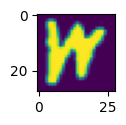

In [254]:
plot_sample(train_img, train_labels,0)

In [255]:
#using EMNIST (Extended MNIST) dataset
train_img,train_labels = extract_training_samples('letters')
test_img,test_labels = extract_test_samples('letters')

#setting A = 10 and Z  = 35, and A-Z = 10-35
train_labels=train_labels+9
test_labels=test_labels+9

In [256]:
set(test_labels)

{10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35}

Training on A-Z

In [257]:
# Train the model and display the activations after each epoch
start_time = time.time()
history = model.fit(train_img, train_labels, epochs=10, validation_data=(test_img, test_labels))
end_time = time.time()

Epoch 1/10
3900/3900 [==============================] - 25s 6ms/step - loss: 69.8693 - accuracy: 0.8301 - val_loss: 75.4266 - val_accuracy: 0.8666
Epoch 2/10
3900/3900 [==============================] - 23s 6ms/step - loss: 54.3840 - accuracy: 0.8934 - val_loss: 90.4443 - val_accuracy: 0.8715
Epoch 3/10
3900/3900 [==============================] - 25s 6ms/step - loss: 45.2097 - accuracy: 0.9136 - val_loss: 94.6574 - val_accuracy: 0.8817
Epoch 4/10
3900/3900 [==============================] - 24s 6ms/step - loss: 38.3860 - accuracy: 0.9251 - val_loss: 103.2325 - val_accuracy: 0.8831
Epoch 5/10
3900/3900 [==============================] - 25s 6ms/step - loss: 33.0826 - accuracy: 0.9340 - val_loss: 106.2751 - val_accuracy: 0.8910
Epoch 6/10
3900/3900 [==============================] - 25s 6ms/step - loss: 29.7798 - accuracy: 0.9394 - val_loss: 117.2772 - val_accuracy: 0.8852
Epoch 7/10
3900/3900 [==============================] - 25s 6ms/step - loss: 25.6963 - accuracy: 0.9453 - val_loss:

In [258]:
test_loss, test_acc = model.evaluate(test_img, test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

650/650 - 3s - loss: 138.9389 - accuracy: 0.8927 - 3s/epoch - 5ms/step
Test accuracy: 0.8927403688430786
Time elapsed:  246.2365369796753


Datasets with both numbers and alphabets

In [259]:
#using EMNIST (Extended MNIST) dataset
final_train_img,final_train_labels = extract_training_samples('balanced')
final_test_img,final_test_labels = extract_test_samples('balanced')

In [260]:
set(final_train_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46}

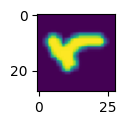

In [261]:
plot_sample(final_train_img, final_train_labels,0)

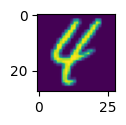

In [262]:
plot_sample(final_train_img, final_train_labels,4)

Here, we will not be fitting our model for this dataset

In [263]:
# Train the model and display the activations after each epoch
#start_time = time.time()
#history = model.fit(final_train_img, final_train_labels, epochs=10, validation_data=(test_img, test_labels))
#end_time = time.time()

In [264]:
test_loss, test_acc = model.evaluate(final_test_img, final_test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

588/588 - 3s - loss: 2513.6768 - accuracy: 0.5103 - 3s/epoch - 5ms/step
Test accuracy: 0.5102659463882446
Time elapsed:  246.2365369796753
